Objectives: 
- Apply Principal component analysis on the given dataset using Scikit-learn and find out the dimensions(also known as components) with maximum variance(where the data is spread out).
- Features with little variance in the data are then projected into new lower dimension. 
- Then train the models on transformed dataset to apply machine learning models.
- Apply Random forest Regressor on old and the transformed datasets and compare them.

There is a huge difference between classifiers and regressors. Classifiers predict one class from a predetermined list or probabilities of belonging to a class. Regressors predict some value, which could be almost anything.
Different metrics are used for classification and regression.
#### Difference between a Classifier and a Regressor.
A <b>Classifier</b> is used to predict a set of specified labels - The simplest( and most hackneyed) example being that of Email Spam Detection where we will always want to classify whether an email is either spam (1) or not spam(0) .  So each email will get either a 0 or 1 or maybe even a fraction(if you go ahead and decide to predict the probability of an email being spam. 
<br />
Examples : Classifying movie reviews based on text, Detecting the presence of seizures from recorded EEG signals, Classifying whether a passenger would survive in the Titanic disaster.
<br /><br />
On the other hand a <b>Regressor</b> is used to predict real valued outputs which vary and dont require outputs predicted to be in a fixed set. For example when wanting to predict the future income of restaurants, we really dont know all the possible outputs.
<br />
Examples : Predicting future Elo ratings of Chess players, Predicting the runs scored by a team in a cricket match

<b>Dataset:</b> Crowdedness at the Campus Gym (Number of attendees every 10 minutes from the last year in the gym) - Kaggle

Label:
<br/><br/>
Number of people
<br/><br/>
Features:
<br/><br/>
date (string; datetime of data)
<br/>
timestamp (int; number of seconds since beginning of day)
<br/>
day_of_week (int; 0 [monday] - 6 [sunday])
<br/>
is_weekend (int; 0 or 1) [boolean, if 1, it's either saturday or sunday, otherwise 0]
<br/>
is_holiday (int; 0 or 1) [boolean, if 1 it's a federal holiday, 0 otherwise]
<br/>
temperature (float; degrees fahrenheit)
<br/>
is_start_of_semester (int; 0 or 1) [boolean, if 1 it's the beginning of a school semester, 0 otherwise]
<br/>
month (int; 1 [jan] - 12 [dec])
<br/>
hour (int; 0 - 23)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('../Principle Component Analysis PCA/data.csv') 
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [3]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [4]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


Text(0.5, 1, 'Correlation between different fearures')

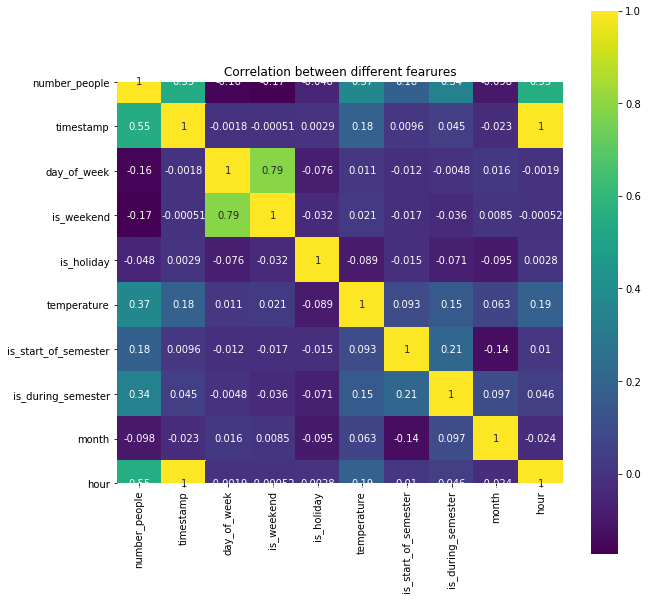

In [6]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [10]:
X = df.iloc[:,2:8]  # all rows, all the features (excp: date) and no labels
y = df.iloc[:, 0]  # all rows, label only

### Standardising data

In [11]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.63654993,  0.50956119, -0.6280507 , -0.05079022,  2.09027384,
        -0.29253482],
       [ 0.68623792,  0.50956119, -0.6280507 , -0.05079022,  2.09027384,
        -0.29253482],
       [ 0.71106127,  0.50956119, -0.6280507 , -0.05079022,  2.09027384,
        -0.29253482],
       ...,
       [ 0.94008862,  1.01036016,  1.59222814, -0.05079022, -0.292433  ,
        -0.29253482],
       [ 0.96515979,  1.01036016,  1.59222814, -0.05079022, -0.292433  ,
        -0.29253482],
       [ 0.99010704,  1.01036016,  1.59222814, -0.05079022, -0.292433  ,
        -0.29253482]])

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-0.01221225, -1.74827045,  0.50960639, -0.41110148,  1.15793497,
         0.83101258],
       [-0.01252094, -1.77681605,  0.53746942, -0.41502514,  1.12857183,
         0.83090197],
       [-0.01267515, -1.79107699,  0.55138936, -0.41698533,  1.11390247,
         0.8308467 ],
       ...,
       [-1.83407039, -0.15801062,  0.73716585, -0.15999954, -0.69546787,
        -0.41471388],
       [-1.83422615, -0.17241393,  0.75122475, -0.16197931, -0.71028368,
        -0.41476969],
       [-1.83438114, -0.18674606,  0.76521417, -0.16394929, -0.72502627,
        -0.41482523]])

In [13]:
pca.get_covariance()

array([[ 1.00001608e+00, -1.79321968e-03, -5.08815704e-04,
         2.85078360e-03,  1.84852463e-01,  9.55105884e-03],
       [-1.79321968e-03,  1.00001608e+00,  7.91350923e-01,
        -7.58632581e-02,  1.11689106e-02, -1.17822146e-02],
       [-5.08815704e-04,  7.91350923e-01,  1.00001608e+00,
        -3.18993471e-02,  2.06736733e-02, -1.66460432e-02],
       [ 2.85078360e-03, -7.58632581e-02, -3.18993471e-02,
         1.00001608e+00, -8.85280154e-02, -1.48581472e-02],
       [ 1.84852463e-01,  1.11689106e-02,  2.06736733e-02,
        -8.85280154e-02,  1.00001608e+00,  9.32433629e-02],
       [ 9.55105884e-03, -1.17822146e-02, -1.66460432e-02,
        -1.48581472e-02,  9.32433629e-02,  1.00001608e+00]])

In [14]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.30002086, 0.20478764, 0.16750837, 0.16320645, 0.1299299 ,
       0.03454679])

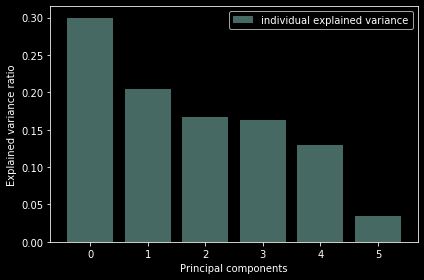

In [17]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(6), explained_variance, alpha=0.5, align='center', label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

we can see from the above plot that first two components constitute 50% of the variance.Third,fourth and fifth components has 46% of the data spread.The last component has less than 5% of the variance. Hence we can try to drop the sixth component.

In [18]:
pca=PCA(n_components=5)
X_new=pca.fit_transform(X)
X_new

array([[-0.01221225, -1.74827045,  0.50960639, -0.41110148,  1.15793497],
       [-0.01252094, -1.77681605,  0.53746942, -0.41502514,  1.12857183],
       [-0.01267515, -1.79107699,  0.55138936, -0.41698533,  1.11390247],
       ...,
       [-1.83407039, -0.15801062,  0.73716585, -0.15999954, -0.69546787],
       [-1.83422615, -0.17241393,  0.75122475, -0.16197931, -0.71028368],
       [-1.83438114, -0.18674606,  0.76521417, -0.16394929, -0.72502627]])

In [19]:
pca.get_covariance()

array([[ 1.00001608e+00, -1.79321968e-03, -5.08815704e-04,
         2.85078360e-03,  1.84852463e-01,  9.55105884e-03],
       [-1.79321968e-03,  1.00001608e+00,  7.91350923e-01,
        -7.58632581e-02,  1.11689106e-02, -1.17822146e-02],
       [-5.08815704e-04,  7.91350923e-01,  1.00001608e+00,
        -3.18993471e-02,  2.06736733e-02, -1.66460432e-02],
       [ 2.85078360e-03, -7.58632581e-02, -3.18993471e-02,
         1.00001608e+00, -8.85280154e-02, -1.48581472e-02],
       [ 1.84852463e-01,  1.11689106e-02,  2.06736733e-02,
        -8.85280154e-02,  1.00001608e+00,  9.32433629e-02],
       [ 9.55105884e-03, -1.17822146e-02, -1.66460432e-02,
        -1.48581472e-02,  9.32433629e-02,  1.00001608e+00]])

In [20]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.30002086, 0.20478764, 0.16750837, 0.16320645, 0.1299299 ])

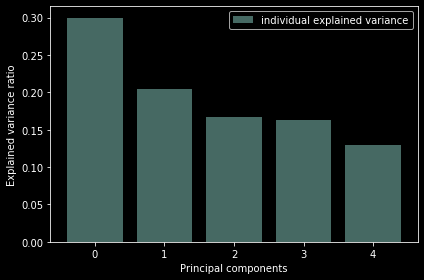

In [21]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(49747, 6)

In [23]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [24]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)    

[0.8410459453920794, 0.8433936721428815, 0.8499985647313872, 0.8513672524409079, 0.8513785225844624, 0.8532336100965109, 0.8526426467841347, 0.8539760104618344, 0.8536768047647619, 0.8536330772602395, 0.8541038909929565, 0.8535526664094488, 0.8554566694445035, 0.8528458213172943, 0.8543265757567885, 0.8534993868380207, 0.854006311272987, 0.8536250461865157, 0.8539999094976183]


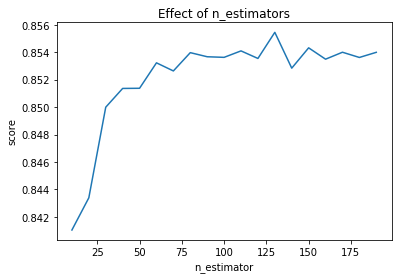

In [25]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)
X_train.shape

(49747, 5)

In [27]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [28]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)

[0.6942500538611582, 0.7053273719154701, 0.7090895625029913, 0.7104750744199504, 0.7112970146832107, 0.7132544178141886, 0.7139327869783099, 0.7142356194007825, 0.7134307389986371, 0.7136834785290758, 0.7137503115568997, 0.7145546019729895, 0.7141176749267177, 0.7153939940479288, 0.7140800573199477, 0.714017365264959, 0.7147433921648185, 0.7157488366727858, 0.7147643565737083]


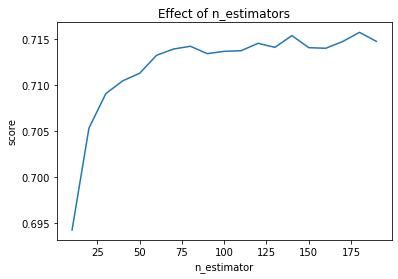

In [29]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

Seems like dropping the low explained variance ratio component is not a good idea for this example. Perhaps, we could try for another example with greater dimensions.